<a href="https://colab.research.google.com/github/ubinix-warun/mad-bootcamp-2024/blob/main/colab/MAD_week2_1_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***This notebook is a part of chapter 4.3***

# 1. Linear regression

Example Dataset:
          X         y
0  0.749080  6.233743
1  1.901429  8.646575
2  1.463988  9.214509
3  1.197317  6.371107
4  0.312037  5.144975


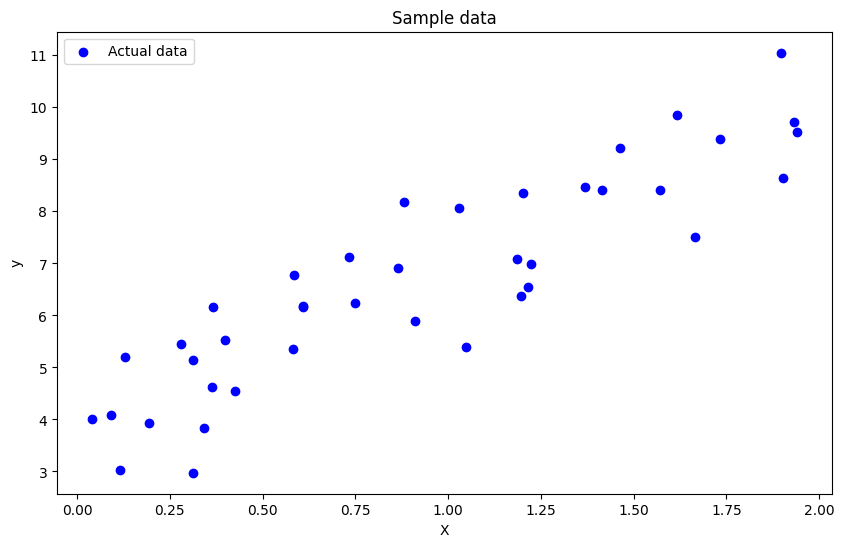

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create an example dataset for linear regression
# Generate random data
np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(40, 1)
y = 4 + 3 * X + np.random.randn(40, 1)

# Convert to DataFrame for better visualization
data = pd.DataFrame(data=np.hstack((X, y)), columns=['X', 'y'])

# Display first few rows of the dataset
print("Example Dataset:")
print(data.head())

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Sample data')
plt.legend()
plt.show()


Linear Regression Model Performance:
Mean Squared Error: 0.7738965173505659
R^2 Score: 0.805611034609357


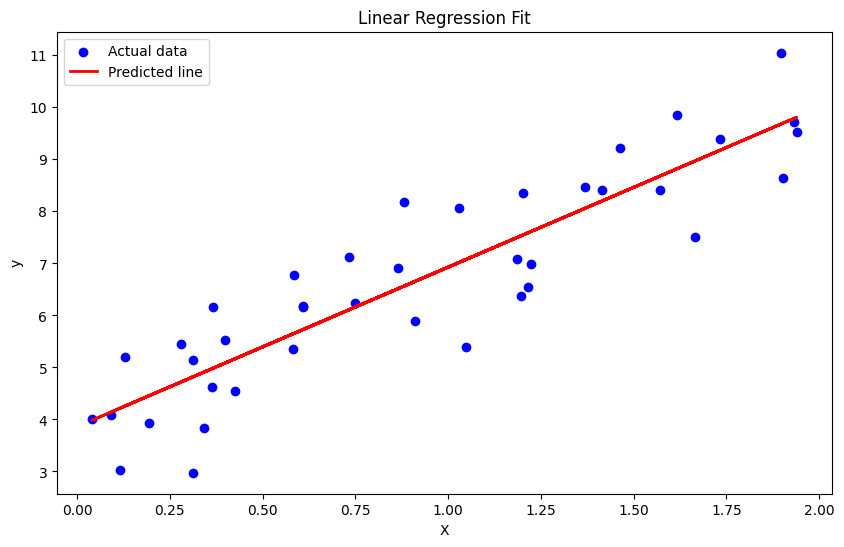

In [ ]:
# Step 2: Prepare code for linear regression
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate the performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\nLinear Regression Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Predicted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

# 2. Polynomial regression

## 2.1 Create an example dataset for polynomial regression

Example Dataset:
          X         y
0 -0.752759 -0.305652
1  2.704286  8.448258
2  1.391964  0.278895
3  0.591951  0.381282
4 -2.063888 -3.561685


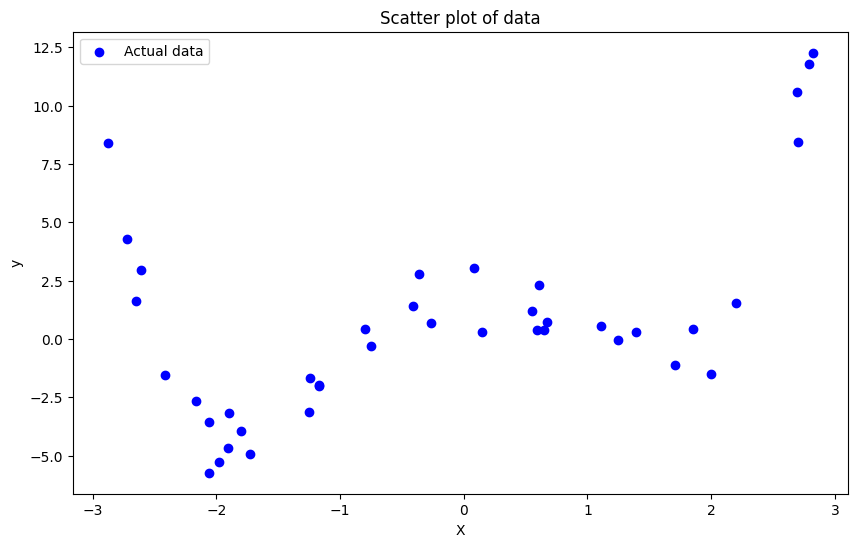

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Generate random data
np.random.seed(42)  # For reproducibility
X = 6 * np.random.rand(40, 1) - 3
y = 0.5 * X**4 - 3* X**2 + X + 2 + np.random.randn(40, 1)

# Convert to DataFrame for better visualization
data = pd.DataFrame(data=np.hstack((X, y)), columns=['X', 'y'])

# Display first few rows of the dataset
print("Example Dataset:")
print(data.head())

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot of data')
plt.legend()
plt.show()

## 2.2 Lower degree polynomial
Example of Lower degree polynomial.



Polynomial Regression Model Performance (degree=2):
Mean Squared Error: 0.7194451799678356
R^2 Score: 0.9621434130988057


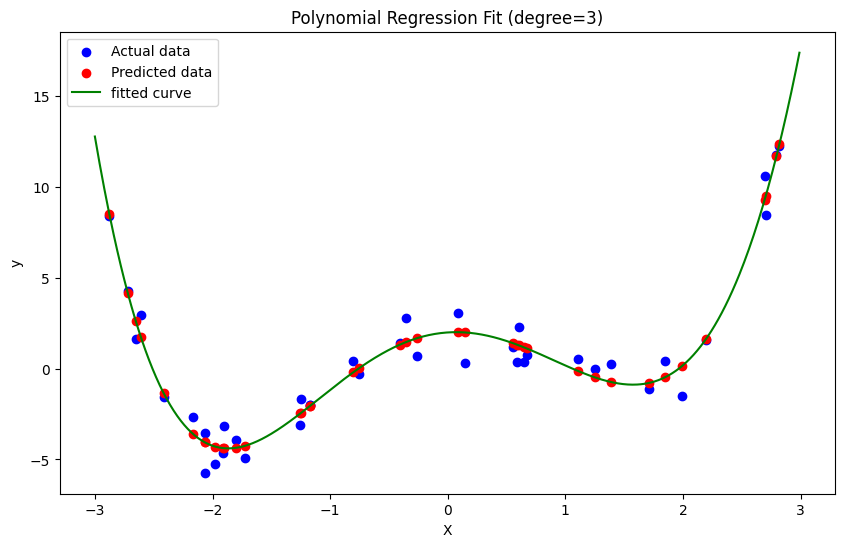

In [ ]:
# Perform polynomial feature transformation
poly = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly.fit_transform(X)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the polynomial features
model.fit(X_poly, y)

# Make predictions using the testing set
y_pred = model.predict(X_poly)

X_all = np.arange(-3,3,0.01).reshape(-1,1)
X_all_poly = poly.transform(X_all)
y_all_pred = model.predict(X_all_poly)

# Calculate the performance metrics
mse_poly = mean_squared_error(y, y_pred)
r2_poly = r2_score(y, y_pred)

print("\nPolynomial Regression Model Performance (degree=2):")
print(f"Mean Squared Error: {mse_poly}")
print(f"R^2 Score: {r2_poly}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X, y_pred, color='red', label='Predicted data')
plt.plot(X_all, y_all_pred, color='green',label = 'fitted curve')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit (degree=3)')
plt.legend()
plt.show()

## 2.3 Higher degree polynomial
Example of higher degree polynomial that results in overfitting.


Polynomial Regression Model Performance (degree=10):
Mean Squared Error: 0.6257296022031585
R^2 Score: 0.9670746462384908


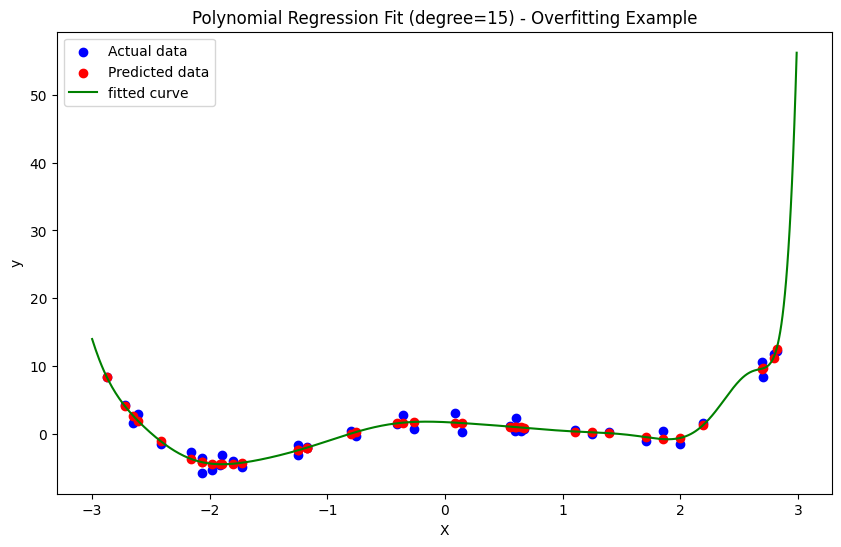

In [ ]:
# Perform polynomial feature transformation with higher degree
poly_high = PolynomialFeatures(degree=15, include_bias=False)
X_poly_high = poly_high.fit_transform(X)

# Create a new Linear Regression model
model_high = LinearRegression()

# Train the model on the higher degree polynomial features
model_high.fit(X_poly_high, y)

# Make predictions using the testing set
y_poly_high_pred = model_high.predict(X_poly_high)

X_all = np.arange(-3,3,0.01).reshape(-1,1)
X_all_poly_high = poly_high.fit_transform(X_all)
y_all_pred_high = model_high.predict(X_all_poly_high)

# Calculate the performance metrics
mse_poly_high = mean_squared_error(y, y_poly_high_pred)
r2_poly_high = r2_score(y, y_poly_high_pred)

print("\nPolynomial Regression Model Performance (degree=10):")
print(f"Mean Squared Error: {mse_poly_high}")
print(f"R^2 Score: {r2_poly_high}")

# Plot the results for the higher degree polynomial
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X, y_poly_high_pred, color='red', label='Predicted data')
plt.plot(X_all, y_all_pred_high, color='green',label = 'fitted curve')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit (degree=15) - Overfitting Example')
plt.legend()
plt.show()

#3. Ridge and lasso regression

## 3.1 Example code for ridge and lasso regression

Example Dataset:
         X1        X2        X3          y
0  0.749080  0.561121  0.420325   6.340789
1  1.901429  3.615431  6.874484  10.132046
2  1.463988  2.143261  3.137707   8.351396
3  1.197317  1.433568  1.716435   6.964467
4  0.312037  0.097367  0.030382   5.029274

Ridge Regression Model Performance:
Mean Squared Error: 1.0847718522118293
R^2 Score: 0.7127780603228733

Lasso Regression Model Performance:
Mean Squared Error: 1.1112323345143011
R^2 Score: 0.7057719502028402


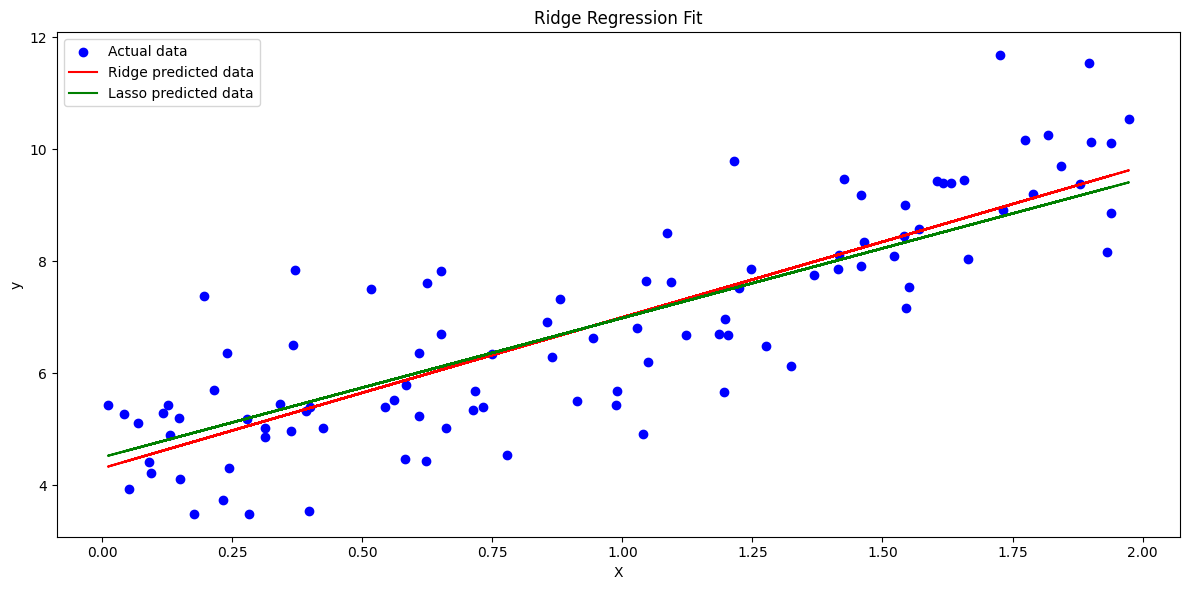

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Create an example dataset for Ridge and Lasso regression
# Generate random data
np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add some noise and higher-order terms to make the data more complex
X_poly = np.hstack((X, X**2, X**3))
y += 0.5 * np.random.randn(100, 1)

# Convert to DataFrame for better visualization
data = pd.DataFrame(data=np.hstack((X_poly, y)), columns=['X1', 'X2', 'X3', 'y'])

# Display first few rows of the dataset
print("Example Dataset:")
print(data.head())

# Step 2: Train and evaluate Ridge and Lasso regression models
# Create Ridge and Lasso Regression models
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Train the models
ridge_model.fit(X, y)
lasso_model.fit(X, y)

# Make predictions using the testing set
ridge_pred = ridge_model.predict(X)
lasso_pred = lasso_model.predict(X)

# Calculate the performance metrics for Ridge
mse_ridge = mean_squared_error(y, ridge_pred)
r2_ridge = r2_score(y, ridge_pred)

print("\nRidge Regression Model Performance:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R^2 Score: {r2_ridge}")

# Calculate the performance metrics for Lasso
mse_lasso = mean_squared_error(y, lasso_pred)
r2_lasso = r2_score(y, lasso_pred)

print("\nLasso Regression Model Performance:")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R^2 Score: {r2_lasso}")

# Plot the results
plt.figure(figsize=(12, 6))

# Ridge plot
plt.scatter(X[:, 0], y, color='blue', label='Actual data')
plt.plot(X[:, 0], ridge_pred, color='red', label='Ridge predicted data')
plt.plot(X[:, 0], lasso_pred, color='green', label='Lasso predicted data')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression Fit')
plt.legend()

plt.tight_layout()
plt.show()

## 3.2 Difference between Ridge and Lasso Regression
####Ridge Regression:

- Ridge regression, also known as Tikhonov regularization, adds a penalty term to the linear regression cost function. This penalty term is the L2 norm (sum of the squares of the coefficients).
- The penalty term in Ridge regression helps to shrink the coefficients of less important features, but it does not drive them to zero. This means that all features are retained in the model, even if they contribute minimally.
- Ridge regression is useful when you have many small/medium-sized features that collectively contribute to the target variable.

####Lasso Regression:

- Lasso regression (Least Absolute Shrinkage and Selection Operator) adds a penalty term to the linear regression cost function. This penalty term is the L1 norm (sum of the absolute values of the coefficients).
- The penalty term in Lasso regression can drive some coefficients to zero, effectively performing feature selection. This means that Lasso regression can eliminate some features entirely if they are not important.
- Lasso regression is useful when you want to create a simpler model that includes only the most significant features.

Example Dataset:
          X         y
0 -0.752759 -0.305652
1  2.704286  8.448258
2  1.391964  0.278895
3  0.591951  0.381282
4 -2.063888 -3.561685


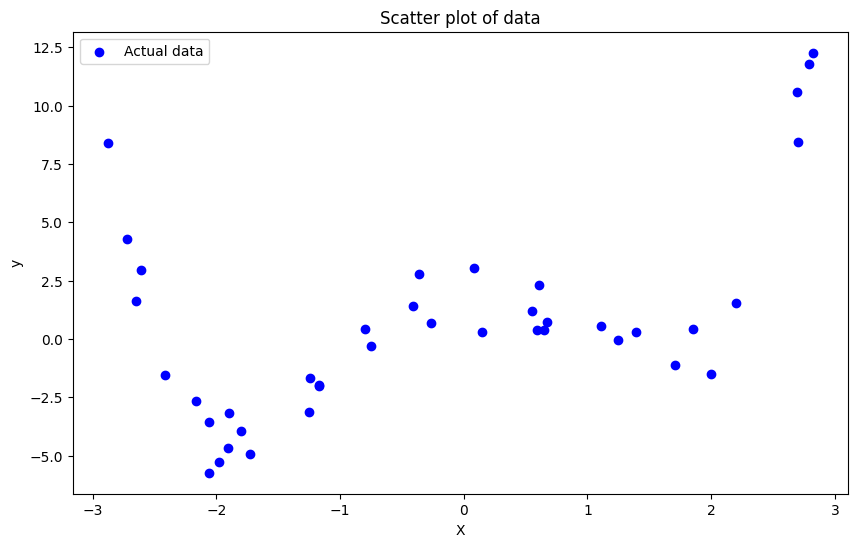

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso

# Generate random data
np.random.seed(42)  # For reproducibility
X = 6 * np.random.rand(40, 1) - 3
y = 0.5 * X**4 - 3* X**2 + X + 2 + np.random.randn(40, 1)

# Convert to DataFrame for better visualization
data = pd.DataFrame(data=np.hstack((X, y)), columns=['X', 'y'])

# Display first few rows of the dataset
print("Example Dataset:")
print(data.head())

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot of data')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.327e+01, tolerance: 7.602e-02
  model = cd_fast.enet_coordinate_descent(



Polynomial Regression Model Performance (degree=10):
Mean Squared Error: 0.7556606913191969
R^2 Score: 0.9602377840240438


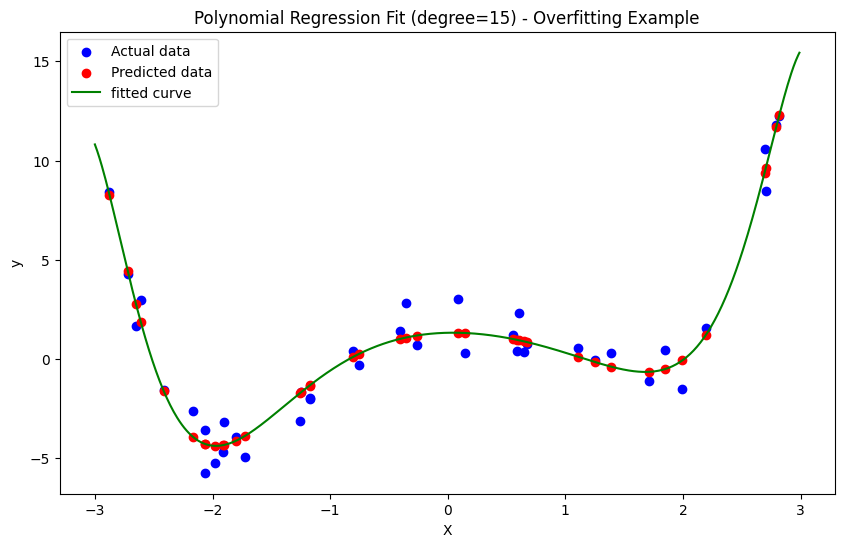

In [ ]:
# Perform polynomial feature transformation with higher degree
poly_high = PolynomialFeatures(degree=15, include_bias=False)
X_poly_high = poly_high.fit_transform(X)

# Create a new regression model using ridge and lasso
# Try to uncomment the following code.
# model_high = LinearRegression()
# model_high = Ridge(alpha=1)
model_high = Lasso(alpha=0.1)

# Train the model on the higher degree polynomial features
model_high.fit(X_poly_high, y)

# Make predictions using the testing set
y_poly_high_pred = model_high.predict(X_poly_high)

X_all = np.arange(-3,3,0.01).reshape(-1,1)
X_all_poly_high = poly_high.fit_transform(X_all)
y_all_pred_high = model_high.predict(X_all_poly_high)

# Calculate the performance metrics
mse_poly_high = mean_squared_error(y, y_poly_high_pred)
r2_poly_high = r2_score(y, y_poly_high_pred)

print("\nPolynomial Regression Model Performance (degree=10):")
print(f"Mean Squared Error: {mse_poly_high}")
print(f"R^2 Score: {r2_poly_high}")

# Plot the results for the higher degree polynomial
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.scatter(X, y_poly_high_pred, color='red', label='Predicted data')
plt.plot(X_all, y_all_pred_high, color='green',label = 'fitted curve')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression Fit (degree=15) - Overfitting Example')
plt.legend()
plt.show()